<a href="https://colab.research.google.com/github/devangelakou/training_projects/blob/main/project_IBM_attrition_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IBM HR Analytics Employee Attrition Modeling

### DESCRIPTION

IBM is an American MNC operating in around 170 countries with major business vertical as computing, software, and hardware.
Attrition is a major risk to service-providing organizations where trained and experienced people are the assets of the company. The organization would like to identify the factors which influence the attrition of employees.

Data Dictionary

    Age: Age of employee
    Attrition: Employee attrition status
    Department: Department of work
    DistanceFromHome
    Education: 1-Below College; 2- College; 3-Bachelor; 4-Master; 5-Doctor;
    EducationField
    EnvironmentSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
    JobSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
    MaritalStatus
    MonthlyIncome
    NumCompaniesWorked: Number of companies worked prior to IBM
    WorkLifeBalance: 1-Bad; 2-Good; 3-Better; 4-Best;
    YearsAtCompany: Current years of service in IBM

### Analysis Task:
- Import attrition dataset and import libraries such as pandas, matplotlib.pyplot, numpy, and seaborn.
- Exploratory data analysis

   * Find the age distribution of employees in IBM
   * Explore attrition by age
   * Explore data for Left employees
   * Find out the distribution of employees by the education field
   * Give a bar chart for the number of married and unmarried employees

- Build up a logistic regression model to predict which employees are likely to attrite.

What questions come in mind when seeing this dataset: 

  - what seems to better predict whether an employee will stay or leave the company 
  - see how features correlate / if they correlate 
  - predict attrition

## Import dataset

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
## not sure i need this one for colab data 
import opendatasets as od
import os

In [ ]:
import plotly.express as px
from matplotlib import style 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
import plotly.figure_factory as ff

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# Code to read csv file into Colaboratory:!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1jCnQ06nFVG-Q3pyPY2NYrLKsbqQZZzUQ/view?usp=sharing' # The shareable lin'
Filename = 'IBM Attrition Data' # enter the filename here - this allows for flexibility in the code

In [ ]:
parts = link.split('/')
parts

['https:',
 '',
 'drive.google.com',
 'file',
 'd',
 '1jCnQ06nFVG-Q3pyPY2NYrLKsbqQZZzUQ',
 'view?usp=sharing']

In [ ]:
id = os.path.basename(parts[-2])
print(id)

1jCnQ06nFVG-Q3pyPY2NYrLKsbqQZZzUQ


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df = pd.read_csv('Filename.csv')# Dataset is now stored in a Pandas Dataframe

In [ ]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [ ]:
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [ ]:
## look for missing data 
df.isnull().any()

Age                        False
Attrition                  False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EnvironmentSatisfaction    False
JobSatisfaction            False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
WorkLifeBalance            False
YearsAtCompany             False
dtype: bool

In [ ]:
df.shape

(1470, 13)

# Exploratory data analysis

   * Find the age distribution of employees in IBM
   * Explore attrition by age
   * Explore data for Left employees
   * Find out the distribution of employees by the education field
   * Give a bar chart for the number of married and unmarried employees


## Age distribution

In [ ]:
# age distribution

hist_data =[df["Age"].values]
group_labels = ['Age'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Age Distribution plot')

fig.show()

## Attrition by Age

In [ ]:
fig = px.box(df, x='Attrition', y='Age', points="all")
fig.update_layout(
    title_text="Analysis in Attrition by Age")
fig.show()

In [ ]:
# Education - Attrition 
fig = px.violin(df, y="Age", x="Education", color="Attrition", box=True, points="all", hover_data=df.columns)
fig.update_layout(title_text="Analysis in Attrition by Age and Education level: 1-Below College; 2- College; 3-Bachelor; 4-Master; 5-Doctor;")
fig.show()

## Explore data for 'Left' employees

In [ ]:
df_left = df[df['Attrition']=='Yes']
df_left

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
14,28,Yes,Research & Development,24,3,Life Sciences,3,3,Single,2028,5,3,4
21,36,Yes,Sales,9,4,Life Sciences,3,1,Single,3407,7,3,5
24,34,Yes,Research & Development,6,1,Medical,2,1,Single,2960,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Sales,9,3,Marketing,4,1,Married,1790,1,2,1
1442,29,Yes,Research & Development,1,4,Medical,1,4,Married,4787,9,4,2
1444,56,Yes,Research & Development,7,2,Technical Degree,4,3,Married,2339,8,1,10
1452,50,Yes,Sales,1,4,Life Sciences,2,3,Divorced,6728,7,3,6


In [ ]:
df_left.shape

(237, 13)

In [ ]:
df_left.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,10.632911,2.839662,2.464135,2.468354,4787.092827,2.940928,2.658228,5.130802
std,9.689350,8.452525,1.008244,1.169791,1.118058,3640.210367,2.678519,0.816453,5.949984
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,28.000000,3.000000,2.000000,1.000000,1.000000,2373.000000,1.000000,2.000000,1.000000
50%,32.000000,9.000000,3.000000,3.000000,3.000000,3202.000000,1.000000,3.000000,3.000000
75%,39.000000,17.000000,4.000000,4.000000,3.000000,5916.000000,5.000000,3.000000,7.000000
max,58.000000,29.000000,5.000000,4.000000,4.000000,19859.000000,9.000000,4.000000,40.000000


In [ ]:
df_left.corr()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.000000,0.033881,0.192184,-0.030219,0.031509,0.500602,0.349638,-0.075944,0.452909
DistanceFromHome,0.033881,1.000000,0.044774,0.019447,-0.046744,0.038948,-0.121304,-0.060009,-0.029204
Education,0.192184,0.044774,1.000000,-0.037230,-0.075939,0.105162,0.056101,-0.102884,0.157490
EnvironmentSatisfaction,-0.030219,0.019447,-0.037230,1.000000,0.046915,-0.089457,-0.167016,-0.099402,0.031420
JobSatisfaction,0.031509,-0.046744,-0.075939,0.046915,1.000000,0.004767,-0.030340,-0.042071,0.095849
MonthlyIncome,0.500602,0.038948,0.105162,-0.089457,0.004767,1.000000,0.187627,0.002965,0.634973
NumCompaniesWorked,0.349638,-0.121304,0.056101,-0.167016,-0.030340,0.187627,1.000000,-0.051898,-0.000311
WorkLifeBalance,-0.075944,-0.060009,-0.102884,-0.099402,-0.042071,0.002965,-0.051898,1.000000,-0.032627
YearsAtCompany,0.452909,-0.029204,0.157490,0.031420,0.095849,0.634973,-0.000311,-0.032627,1.000000


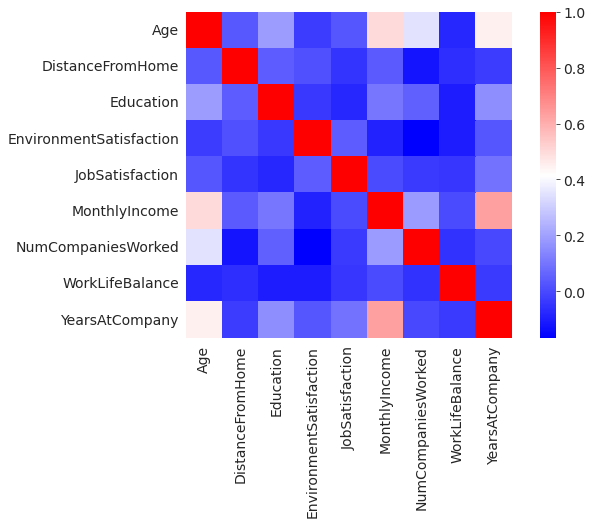

In [ ]:
sns.heatmap(data = df_left.corr(), 
            square = True,
            cmap = 'bwr')

It appears that the values with the highest correlation are: 
  - Age & Years at the Company
  - Age & Monthly Income
  - Monthly Income & Year at the Company

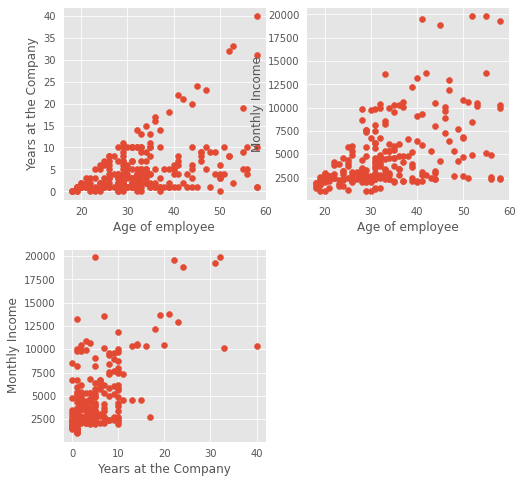

In [ ]:
## plot scatter plot

style.use('ggplot')
# set figure size
plt.figure(figsize=(8,8))
# subplot adjust to fix the height and width of subplots in the figure
plt.subplots_adjust(hspace=.25)

plt.subplot(2,2,1)
plt.scatter(df_left['Age'],df_left['YearsAtCompany'])
plt.xlabel('Age of employee')
plt.ylabel('Years at the Company')

plt.subplot(2,2,2)
plt.scatter(df_left['Age'],df_left['MonthlyIncome'])
plt.xlabel('Age of employee')
plt.ylabel('Monthly Income')

plt.subplot(2,2,3)
plt.scatter(df_left['YearsAtCompany'],df_left['MonthlyIncome'])
plt.xlabel('Years at the Company')
plt.ylabel('Monthly Income')

plt.show()

### Other plots

In [ ]:
fig = px.histogram(df, x="MonthlyIncome", color="Attrition", marginal="violin", hover_data=df.columns)
fig.show()

In [ ]:
fig = px.histogram(df, x="Education", color="Attrition", marginal="violin", hover_data=df.columns)
fig.show()

In [ ]:
fig = px.histogram(df, x="YearsAtCompany", color="Attrition", marginal="violin", hover_data=df.columns)
fig.show()

In [ ]:
fig = px.histogram(df, x="JobSatisfaction", color="Attrition", marginal="violin", hover_data=df.columns)
fig.show()

In [ ]:
fig = px.histogram(df, x="DistanceFromHome", color="Attrition", marginal="violin", hover_data=df.columns)
fig.show()

## Find out the distribution of employees by the education field

In [ ]:
unq_EduFields = df['EducationField'].unique()
unq_EduFields

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [ ]:
Employees_by_EduField = df.groupby(['EducationField','Attrition']).size().sort_values()
Employees_by_EduField

EducationField    Attrition
Human Resources   Yes            7
Other             Yes           11
Human Resources   No            20
Technical Degree  Yes           32
Marketing         Yes           35
Medical           Yes           63
Other             No            71
Life Sciences     Yes           89
Technical Degree  No           100
Marketing         No           124
Medical           No           401
Life Sciences     No           517
dtype: int64

In [ ]:
dd = pd.DataFrame(Employees_by_EduField)
dd = dd.reset_index()

In [ ]:
dd = dd.rename(columns={0: 'Employees'})

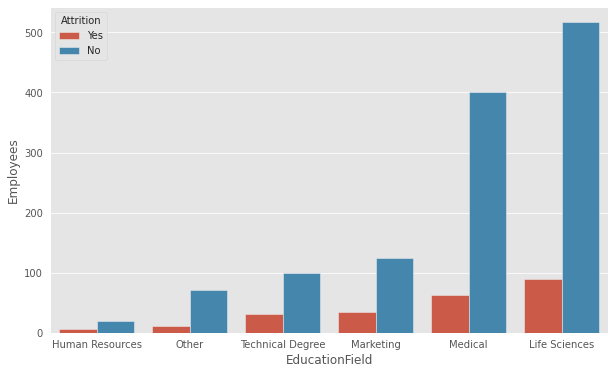

In [ ]:
sns.barplot(data=dd, x='EducationField', y='Employees', hue="Attrition")

### Give a bar chart for the number of married and unmarried employees

In [ ]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [ ]:
df['New_Marital_Status'] = df['MaritalStatus'].replace(['Single','Divorced'],'Not Married')
df.head(3)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,New_Marital_Status
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,Not Married
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10,Married
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0,Not Married


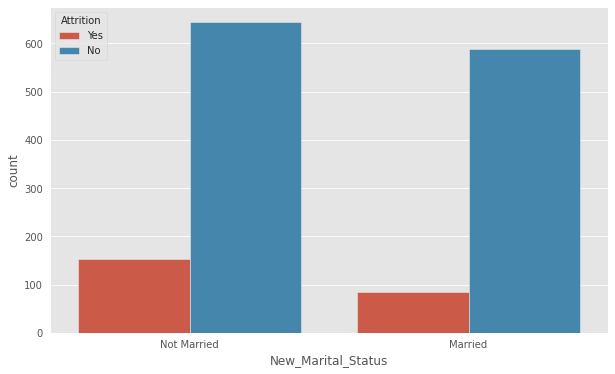

In [ ]:
sns.countplot(data = df, x= 'New_Marital_Status', hue='Attrition')

# Logistic Regression

Build up a logistic regression model to predict which employees are likely to attrite.

In [225]:
list_keep_cols = ['Age', 'Department', 'DistanceFromHome', 'Education', 'EducationField',
        'EnvironmentSatisfaction', 'JobSatisfaction', 'MaritalStatus',
        'MonthlyIncome', 'NumCompaniesWorked', 'WorkLifeBalance',
        'YearsAtCompany']
list_keep_cols

['Age',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'WorkLifeBalance',
 'YearsAtCompany']

In [227]:

# Create training, validation and test sets
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=50)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

# Create inputs and targets
input_cols = list(list_keep_cols)
target_col = 'Attrition'
train_inputs, train_targets = train_df[input_cols].copy(), train_df[target_col].copy()
val_inputs, val_targets = val_df[input_cols].copy(), val_df[target_col].copy()
test_inputs, test_targets = test_df[input_cols].copy(), test_df[target_col].copy()

# Identify numeric and categorical columns
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

# Impute missing numerical values
imputer = SimpleImputer(strategy = 'median').fit(df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

# Scale numeric features
scaler = MinMaxScaler().fit(df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

# Save processed data to disk
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

# Load processed data from disk
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')
train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Train the model

Accuracy: 84.01%
Accuracy: 83.33%


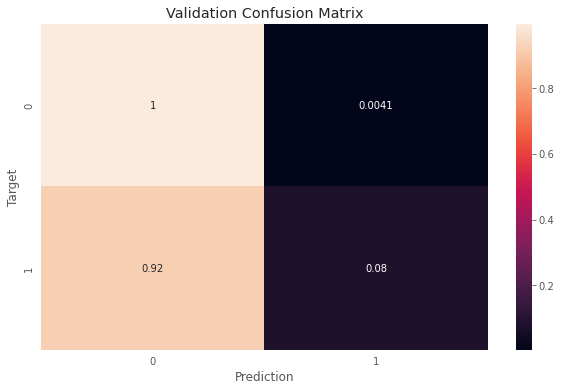

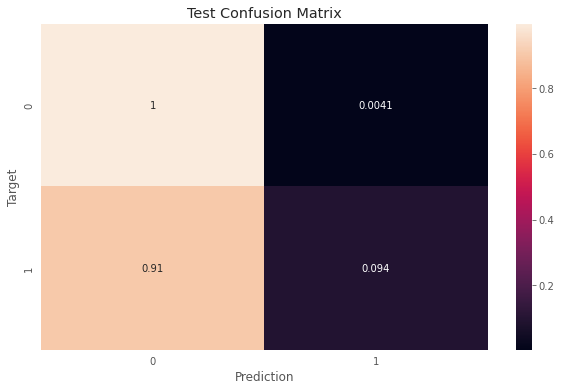

In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

# Select the columns to be used for training/prediction
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

# Create and train the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, train_targets)

# Generate predictions and probabilities
train_preds = model.predict(X_train)
train_probs = model.predict_proba(X_train)
accuracy_score(train_targets, train_preds)

# Helper function to predict, compute accuracy & plot confustion matrix
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

# Evaluate on validation and test set
val_preds = predict_and_plot(X_val, val_targets, 'Validation')
test_preds = predict_and_plot(X_test, test_targets, 'Test')

# Save the trained model & load it back
ibm_attrition = {'model': model, 'imputer': imputer, 'scaler': scaler, 'encoder': encoder,
               'input_cols': input_cols, 'target_col': target_col, 'numeric_cols': numeric_cols,
               'categorical_cols': categorical_cols, 'encoded_cols': encoded_cols}
joblib.dump(ibm_attrition, 'ibm_attrition.joblib')
ibm_attrition2 = joblib.load('ibm_attrition.joblib')

In [229]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.99197861, 0.00802139],
       [0.91044776, 0.08955224]])

### Test how the model is doing compared to a random model

In [230]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

In [231]:
accuracy_score(test_targets, random_guess(X_test))

0.5204081632653061

The accuracy of the training for a random model is 52%, much lower than the one we got for our training. So, we are performing much better than a random prediction. 

### Train with only numerical columns/features

Accuracy: 82.99%
Accuracy: 82.31%


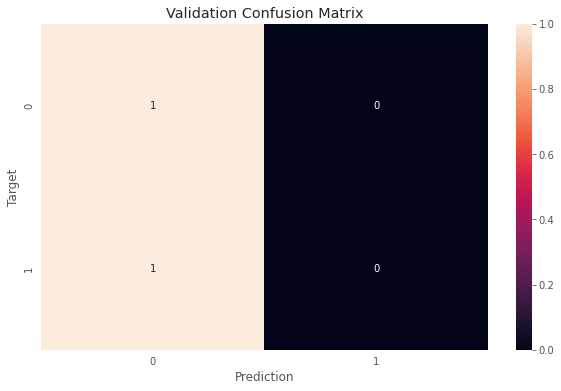

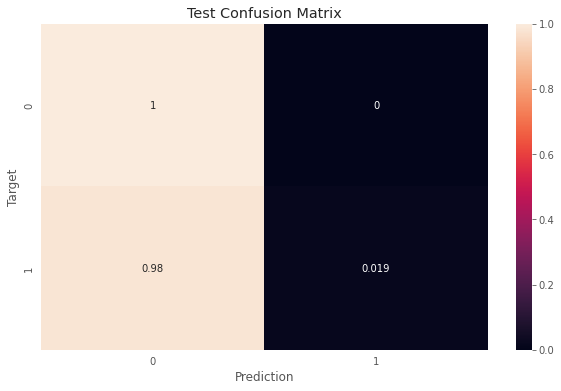

In [232]:
# Select the columns to be used for training/prediction
X_train = train_inputs[numeric_cols]
X_val = val_inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

# Create and train the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, train_targets)

# Generate predictions and probabilities
train_preds = model.predict(X_train)
train_probs = model.predict_proba(X_train)
accuracy_score(train_targets, train_preds)

# Evaluate on validation and test set
val_preds = predict_and_plot(X_val, val_targets, 'Validation')
test_preds = predict_and_plot(X_test, test_targets, 'Test')


### Train with only categorical columns/features

Accuracy: 82.99%
Accuracy: 81.97%


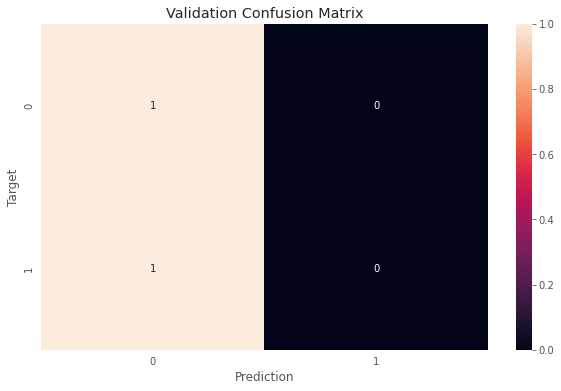

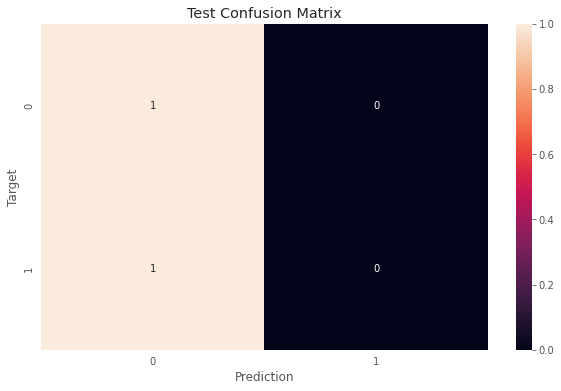

In [233]:
# Select the columns to be used for training/prediction
X_train = train_inputs[encoded_cols]
X_val = val_inputs[encoded_cols]
X_test = test_inputs[encoded_cols]

# Create and train the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, train_targets)

# Generate predictions and probabilities
train_preds = model.predict(X_train)
train_probs = model.predict_proba(X_train)
accuracy_score(train_targets, train_preds)

# Evaluate on validation and test set
val_preds = predict_and_plot(X_val, val_targets, 'Validation')
test_preds = predict_and_plot(X_test, test_targets, 'Test')


Although the accuracy seems to be close to the one with the combined numerical and categorical values, the confusion matrix looks like we've overtrained our dataset. 